# CPU Price Projections

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

parts_analysis = ["#046d8b", "#0190ba", "#004b60", "#e0576a", "#b42a3d", "#9a303e"]

In [13]:
df = pd.read_csv('PC_Part_Picker_Datasets\CPU_Data.csv')
#drop GHz from Performance Core Clock and Boost Clock
df['Performance Core Clock'] = df['Performance Core Clock'].str.replace(' GHz', '')
df['Boost Clock'] = df['Boost Clock'].str.replace(' GHz', '')
#change Performance Core Clock and Boost Clock to float
df['Performance Core Clock'] = df['Performance Core Clock'].astype(float)
df['Boost Clock'] = df['Boost Clock'].astype(float)
#remove the spaces from the column names
df.columns = df.columns.str.replace(' ', '_')
#remove W from TDP Column
df['TDP'] = df['TDP'].str.replace(' W', '')
# For Brand Column change AMD to 1 and Intel to 0
df['Brand'] = df['Brand'].replace('AMD', 1)
df['Brand'] = df['Brand'].replace('Intel', 0)
# For Integrated_Graphics replace empty values with 0
df['Integrated_Graphics'] = df['Integrated_Graphics'].fillna(0)
# For Integrated Graphics change each unique value to a number
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon', 1)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 770', 2)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 7', 3)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 8', 4)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 740M', 5)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 780M', 6)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 760M', 7)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 730', 8)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 630', 9)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel HD Graphics 630', 10)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 750', 11)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 11', 12)

# For Socket_Type change each unique value to a number
df['Socket_Type'] = df['Socket_Type'].replace('AM5', 1)
df['Socket_Type'] = df['Socket_Type'].replace('AM4', 2)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1700', 3)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1200', 4)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1151', 5)

# For Sockets_Supported change each unique value to a number
df['Sockets_Supported'] = df['Sockets_Supported'].replace('Yes', 1)
df['Sockets_Supported'] = df['Sockets_Supported'].replace('No', 0)

df.head()

,Brand,Model,Core_Count,Performance_Core_Clock,Boost_Clock,TDP,Integrated_Graphics,Sockets_Supported,Rating,Rating_Count,Price,Release_Year,Socket_Type
0,1,Ryzen 7 7800X3D,8,4.2,5.0,120,1,1,5,208,369.00,2022.0,1
1,1,Ryzen 5 7600X,6,4.7,5.3,105,1,1,5,113,218.46,2022.0,1
2,1,Ryzen 5 5600X,6,3.7,4.6,65,0,1,5,609,151.24,2021.0,2
3,0,Core i9-14900K,24,3.2,6.0,125,2,1,5,13,544.99,2023.0,3
4,1,Ryzen 5 7600,6,3.8,5.1,65,1,1,5,65,260.73,2022.0,1


# Splitting the Data into a Train and Test Sets

In [14]:
#Creating the Response and Feature Variables
X = df.drop(['Model', 'Release_Year'], axis=1)
X.head()
y = df['Release_Year']

#Splitting the Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy:  0.30952380952380953
Classification Report: 
              precision    recall  f1-score   support

      2016.0       0.45      1.00      0.62         5
      2017.0       0.00      0.00      0.00         6
      2018.0       0.56      0.62      0.59         8
      2019.0       0.22      0.33      0.27         6
      2020.0       0.00      0.00      0.00         5
      2021.0       0.00      0.00      0.00         9
      2022.0       0.00      0.00      0.00         2
      2023.0       0.08      1.00      0.14         1

    accuracy                           0.31        42
   macro avg       0.16      0.37      0.20        42
weighted avg       0.19      0.31      0.23        42

Confusion Matrix: 
[[5 0 0 0 0 0 0 0]
 [3 0 1 2 0 0 0 0]
 [2 0 5 1 0 0 0 0]
 [1 0 3 2 0 0 0 0]
 [0 0 0 0 0 0 0 5]
 [0 0 0 3 0 0 0 6]
 [0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 1]]
F1 Score: 
0.22794617847138857


C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

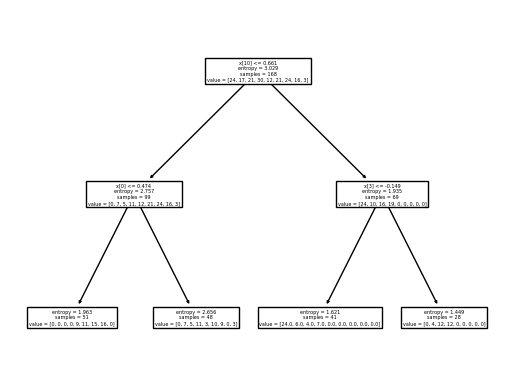

In [15]:
#Creating a Decision Tree using entropy as attribute selection
myTree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
myTree.fit(X_train, y_train)

#Visualizing the Decision Tree
tree.plot_tree(myTree)

#Predicting the Test Data
y_pred = myTree.predict(X_test)

#Evaluating the Model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report: ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

#calculate the F1 score
print('F1 Score: ')
print(f1_score(y_test, y_pred, average = 'weighted'))
f1_score_DecisionTree = f1_score(y_test, y_pred, average = 'weighted')

In [16]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

#calculate the F1 score
print('F1 Score: ')
print(f1_score(y_test, y_pred, average = 'weighted'))
f1_score_LogisticRegression = f1_score(y_test, y_pred, average = 'weighted')

Accuracy: 0.6190476190476191

Classification Report:
              precision    recall  f1-score   support

      2016.0       0.57      0.80      0.67         5
      2017.0       0.33      0.33      0.33         6
      2018.0       0.83      0.62      0.71         8
      2019.0       0.67      1.00      0.80         6
      2020.0       0.75      0.60      0.67         5
      2021.0       0.83      0.56      0.67         9
      2022.0       0.50      0.50      0.50         2
      2023.0       0.00      0.00      0.00         1

    accuracy                           0.62        42
   macro avg       0.56      0.55      0.54        42
weighted avg       0.66      0.62      0.62        42

Confusion Matrix: 
[[4 1 0 0 0 0 0 0]
 [2 2 1 1 0 0 0 0]
 [1 1 5 1 0 0 0 0]
 [0 0 0 6 0 0 0 0]
 [0 1 0 0 3 1 0 0]
 [0 1 0 1 1 5 0 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0]]
F1 Score: 
0.6233560090702948


In [17]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

#calculate the F1 score
print('F1 Score: ')
print(f1_score(y_test, y_pred, average = 'weighted'))
f1_score_KNN = f1_score(y_test, y_pred, average = 'weighted')

Accuracy: 0.42857142857142855

Classification Report:
              precision    recall  f1-score   support

      2016.0       0.50      1.00      0.67         5
      2017.0       0.67      0.67      0.67         6
      2018.0       1.00      0.25      0.40         8
      2019.0       0.36      0.67      0.47         6
      2020.0       0.33      0.20      0.25         5
      2021.0       0.33      0.11      0.17         9
      2022.0       0.33      0.50      0.40         2
      2023.0       0.00      0.00      0.00         1
      2024.0       0.00      0.00      0.00         0

    accuracy                           0.43        42
   macro avg       0.39      0.38      0.34        42
weighted avg       0.52      0.43      0.40        42

Confusion Matrix: 
[[5 0 0 0 0 0 0 0 0]
 [2 4 0 0 0 0 0 0 0]
 [3 1 2 1 0 1 0 0 0]
 [0 0 0 4 1 1 0 0 0]
 [0 0 0 3 1 0 0 1 0]
 [0 1 0 3 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]]
F1 Score: 
0.40254435107376285


C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [18]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

#calculate the F1 score
print('F1 Score: ')
print(f1_score(y_test, y_pred, average = 'weighted'))
f1_score_SVM = f1_score(y_test, y_pred, average = 'weighted')

Accuracy: 0.6904761904761905

Classification Report:
              precision    recall  f1-score   support

      2016.0       0.62      1.00      0.77         5
      2017.0       0.43      0.50      0.46         6
      2018.0       1.00      0.62      0.77         8
      2019.0       0.67      1.00      0.80         6
      2020.0       1.00      0.40      0.57         5
      2021.0       0.88      0.78      0.82         9
      2022.0       0.50      0.50      0.50         2
      2023.0       0.00      0.00      0.00         1

    accuracy                           0.69        42
   macro avg       0.64      0.60      0.59        42
weighted avg       0.75      0.69      0.69        42

Confusion Matrix: 
[[5 0 0 0 0 0 0 0]
 [2 3 0 1 0 0 0 0]
 [1 1 5 1 0 0 0 0]
 [0 0 0 6 0 0 0 0]
 [0 2 0 0 2 1 0 0]
 [0 1 0 1 0 7 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0]]
F1 Score: 
0.68662234124419


In [19]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='linear')

# Fit the model on the training data
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [20]:
#Predict the Release Year given

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

parts_analysis = ["#046d8b", "#0190ba", "#004b60", "#e0576a", "#b42a3d", "#9a303e"]

In [22]:
df.head()

,Brand,Model,Core_Count,Performance_Core_Clock,Boost_Clock,TDP,Integrated_Graphics,Sockets_Supported,Rating,Rating_Count,Price,Release_Year,Socket_Type
0,1,Ryzen 7 7800X3D,8,4.2,5.0,120,1,1,5,208,369.00,2022.0,1
1,1,Ryzen 5 7600X,6,4.7,5.3,105,1,1,5,113,218.46,2022.0,1
2,1,Ryzen 5 5600X,6,3.7,4.6,65,0,1,5,609,151.24,2021.0,2
3,0,Core i9-14900K,24,3.2,6.0,125,2,1,5,13,544.99,2023.0,3
4,1,Ryzen 5 7600,6,3.8,5.1,65,1,1,5,65,260.73,2022.0,1


In [23]:
#Creating the Response and Feature Variables
X = df[['Core_Count','Boost_Clock', 'Performance_Core_Clock']]
y = df['Release_Year']

#Splitting the Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# conduct Multiple Linear Regression with the two features
# Initialize the linear regression model
linear_model = linear_model.LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = linear_model.predict(X_test)

# Calculate accuracy
accuracy = linear_model.score(X_test, y_test)
print("Accuracy:", accuracy)






Accuracy: 0.39478848692655366


In [25]:
#calculate the adjusted R-squared value
n = len(X_test)
p = X_test.shape[1]
r_squared = linear_model.score(X_test, y_test)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.3470086306312815


In [26]:
#print out a summary of the model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Release_Year   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     47.07
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           5.35e-22
Time:                        13:27:42   Log-Likelihood:                -328.29
No. Observations:                 168   AIC:                             664.6
Df Residuals:                     164   BIC:                             677.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2019.4643      0.133   1.51e+04      0.0

In [27]:
X_new = pd.DataFrame({'Core_Count':[24],'Boost_Clock': [8], 'Performance_Core_Clock': [6]})
X_new = scaler.transform(X_new)
X_new = sm.add_constant(X_new)
y_new = linear_model.predict(X_new)
print(y_new)


[2027.23392915]


In [30]:
#Creating the Response and Feature Variables
X = df[['Release_Year','Boost_Clock', 'Performance_Core_Clock']]
y = df['Core_Count']

#Splitting the Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

#calculate the F1 score
print('F1 Score: ')
print(f1_score(y_test, y_pred, average = 'weighted'))
f1_score_SVM = f1_score(y_test, y_pred, average = 'weighted')

Accuracy: 0.4523809523809524

Classification Report:
              precision    recall  f1-score   support

           4       0.60      0.50      0.55         6
           6       0.48      0.67      0.56        15
           8       0.36      0.50      0.42         8
          10       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          16       0.25      1.00      0.40         1
          20       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1

    accuracy                           0.45        42
   macro avg       0.34      0.46      0.37        42
weighted avg       0.35      0.45      0.39        42

Confusion Matrix: 
[[ 3  3  0  0  0  0  0  0]
 [ 2 10  3  0  0  0  0  0]
 [ 0  3  4  0  0  1  0  0]
 [ 0  2  3  0  0  0  0  0]
 [ 0  3  1  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1]]
F1 Score: 
0.3898686109212425


C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [33]:
#Predict the Core Count given Release Year of 2022, Boost Clock of 4 GHz, and Performance Core Clock of 3 GHz
X_new = pd.DataFrame({'Release_Year':[2030],'Boost_Clock': [6], 'Performance_Core_Clock': [5]})
X_new = scaler.transform(X_new)
X_new = sm.add_constant(X_new)
y_new = svm_model.predict(X_new)
print(y_new)


[14]
